In [3]:

import pandas as pd

# Load news data
news_df = pd.read_csv(r'C:\Users\Dar Computers\Desktop\10Acadamy\week 1\DataSet\raw_analyst_ratings.csv')
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')
news_df['date'] = news_df['date'].dt.date


# Load stock data (example: AAPL)
stock_df = pd.read_csv(r'C:\Users\Dar Computers\Desktop\10Acadamy\week 1\DataSet\yfinance_data\AMZN_historical_data.csv')
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date


In [41]:
pip install textblob


  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)

  Attempting uninstall: nltk

    Found existing installation: nltk 3.8.1

   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
    Uninstalling nltk-3.8.1:
   ---------------------------------------- 0/2 [nltk]
      Successfully uninstalled nltk-3.8.1
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   -------------

In [43]:

from textblob import TextBlob


def get_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity

news_df['sentiment'] = news_df['headline'].apply(get_sentiment)


In [51]:

stock_df = stock_df.sort_values('Date')
stock_df['daily_return'] = stock_df['Close'].pct_change()


In [55]:

daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()


In [77]:
stock_df.rename(columns={'Date': 'date'}, inplace=True)
combined_df = pd.merge(daily_sentiment, stock_df[['date', 'daily_return']], on='date', how='inner')


In [79]:
pip install scipy


In [81]:

from scipy.stats import pearsonr

correlation, p_value = pearsonr(combined_df['sentiment'], combined_df['daily_return'])
print("Pearson Correlation:", correlation)
print("P-value:", p_value)


Pearson Correlation: -0.019444381937073228
P-value: 0.3591598587322078


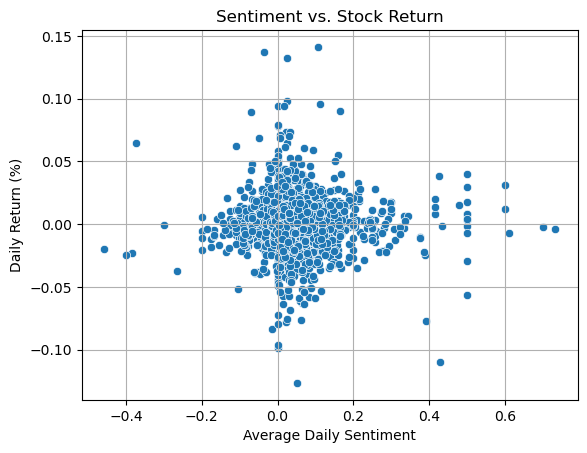

In [83]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=combined_df, x='sentiment', y='daily_return')
plt.title("Sentiment vs. Stock Return")
plt.xlabel("Average Daily Sentiment")
plt.ylabel("Daily Return (%)")
plt.grid(True)
plt.show()
